<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Cricket_Match_Results_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis of Cricket Match Wins- Home Field Advantage

Analyzing the results of cricket Matches from 1972 to 2017 to check if the team playing on their home pitch has a higher probability of winning the match.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [25]:
df=pd.read_csv("Dateset_ODI+-+Dateset_ODI.csv")
df.head(40)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
5,ODI # 6,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973"
6,ODI # 7,England,New Zealand,no result,NaN,Manchester,"Jul 20, 1973"
7,ODI # 8,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973"
8,ODI # 9,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973"
9,ODI # 10,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [10]:
last_column_name = df.columns[-1]
print(last_column_name)
new_df = df[[last_column_name]]

# Print the new DataFrame to verify
new_df


Match Date


,Match Date
0,"Jan 5, 1971"
1,"Aug 24, 1972"
2,"Aug 26, 1972"
3,"Aug 28, 1972"
4,"Feb 11, 1973"
...,...
3927,"Oct 22, 2017"
3928,"Oct 22, 2017"
3929,"Oct 23, 2017"
3930,"Oct 25, 2017"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.dtypes

,0
Scorecard,object
Team 1,object
Team 2,object
Winner,object
Margin,object
Ground,object
Match Date,object


In [26]:
df.isnull().sum()

,0
Scorecard,0
Team 1,0
Team 2,0
Winner,0
Margin,179
Ground,0
Match Date,0


In [27]:
df.loc[49]

,49
Scorecard,ODI # 50
Team 1,England
Team 2,Pakistan
Winner,England
Margin,132 runs
Ground,Manchester
Match Date,"May 24-25, 1978"


In [28]:
df[df["Ground"]=="Devonport"].count()

,0
Scorecard,1
Team 1,1
Team 2,1
Winner,1
Margin,1
Ground,1
Match Date,1


In [29]:
df[df["Winner"]=="Australia"]

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
9,ODI # 10,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974"
10,ODI # 11,New Zealand,Australia,Australia,31 runs,Christchurch,"Mar 31, 1974"
20,ODI # 21,Australia,Pakistan,Australia,73 runs,Leeds,"Jun 7, 1975"
...,...,...,...,...,...,...,...
3816,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
3819,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
3821,ODI # 3822,Australia,Pakistan,Australia,86 runs,Sydney,"Jan 22, 2017"
3825,ODI # 3826,Australia,Pakistan,Australia,57 runs,Adelaide,"Jan 26, 2017"


In [30]:
df["Winner"].value_counts()

,count
Winner,
Australia,555
India,476
Pakistan,469
West Indies,380
Sri Lanka,372
South Africa,361
England,343
New Zealand,324
no result,140


In [ ]:
df[df["Winner"]==df["Team 2"]]

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
8,ODI # 9,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973"
9,ODI # 10,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974"
10,ODI # 11,New Zealand,Australia,Australia,31 runs,Christchurch,"Mar 31, 1974"
13,ODI # 14,England,Pakistan,Pakistan,7 wickets,Nottingham,"Aug 31, 1974"
...,...,...,...,...,...,...,...
3907,ODI # 3908,Sri Lanka,India,India,168 runs,Colombo (RPS),"Aug 31, 2017"
3908,ODI # 3909,Sri Lanka,India,India,6 wickets,Colombo (RPS),"Sep 3, 2017"
3916,ODI # 3917,India,Australia,Australia,21 runs,Bengaluru,"Sep 28, 2017"
3919,ODI # 3920,P.N.G.,Scotland,Scotland,101 runs,Port Moresby,"Oct 6, 2017"


In [37]:
Team2_wins=len(df[df["Winner"]==df["Team 2"]])

In [38]:
Team1_wins=len(df[df["Winner"]==df["Team 1"]])

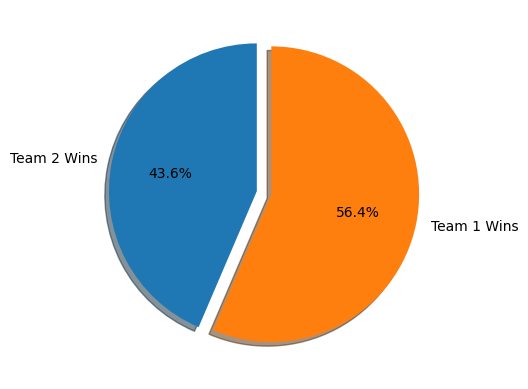

In [49]:
labels = ['Team 2 Wins', 'Team 1 Wins']
sizes = [Team2_wins, Team1_wins]
explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Team 1 Wins')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('on')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Insight:**

This result clearly shows that the team playing in their own country has more chances of winning than the visiting team. This may be due to the home team understanding the pitch better due to having more practice on it and/or because of the support of home spectators. This has been called the "Home Team Advantage". However it can be seen that this advantage is nowhere close to 100%. Infact it is only a little bit advantageous since the visiting teams have won matches 43.6% of the time.